In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('ANZ.csv')

In [3]:
data.shape

(12043, 23)

## Head of Data

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Data Preparation for Machine Learning

## Deriving a Salary Feature

In [5]:
data1 = data.copy()

In [6]:
g = data1.loc[:, ['customer_id', 'amount', 'txn_description']]

In [7]:
f = g[g['txn_description'] == 'PAY/SALARY']
sal_cust = f.groupby(['customer_id']).mean().reset_index()
sal_cust

,customer_id,amount
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73
...,...,...
95,CUS-72755508,725.32
96,CUS-809013380,1037.07
97,CUS-860700529,1808.62
98,CUS-880898248,1433.98


In [8]:
unique_id = list(sal_cust['customer_id'])
am = list(sal_cust['amount'])
salary = []

for i in range(len(data['customer_id'])):
    if data['customer_id'][i] in unique_id:
        ind = unique_id.index(data['customer_id'][i])
        salary.append(am[ind])
data['salary'] = salary

In [9]:
## Confirmation

g = data.loc[:, ['customer_id', 'amount', 'txn_description', 'salary']]

f = g[g['txn_description'] == 'PAY/SALARY']
sal_cust = f.groupby(['customer_id']).mean().reset_index()
sal_cust

,customer_id,amount,salary
0,CUS-1005756958,970.47,970.47
1,CUS-1117979751,3578.65,3578.65
2,CUS-1140341822,1916.51,1916.51
3,CUS-1147642491,1711.39,1711.39
4,CUS-1196156254,3903.73,3903.73
...,...,...,...
95,CUS-72755508,725.32,725.32
96,CUS-809013380,1037.07,1037.07
97,CUS-860700529,1808.62,1808.62
98,CUS-880898248,1433.98,1433.98


## Exploratory Analysis

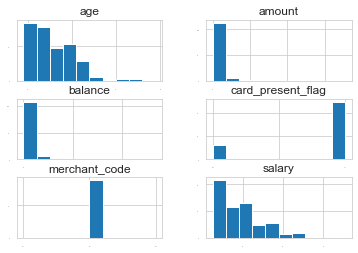

In [10]:
# histograms
import matplotlib.pyplot as pyplot

data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

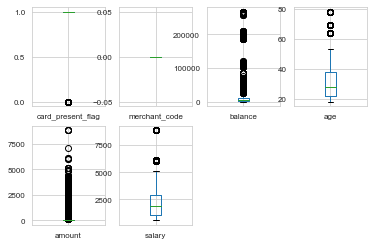

In [11]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

C:\Users\vivek\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\vivek\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\vivek\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


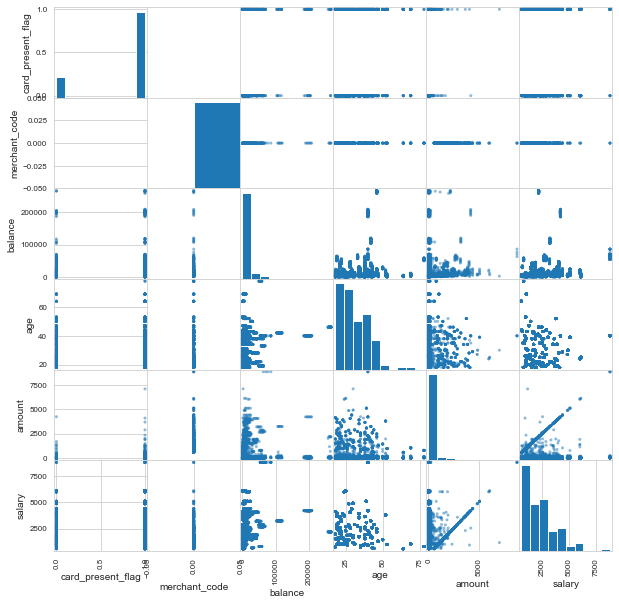

In [12]:
# scatter plot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize = (10,10), alpha = 0.5)
pyplot.show()

In [13]:
## Pearson Correlation Assumptions:

## Variables are Normally Distributed
## No Significant Outliers
## The relationship between the variables is approximately linear

## If assumptions not met, perform nonparametric Spearmans correlation

In [14]:
# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

cols = ['amount', 'age', 'balance', 'salary']
for i in cols:
    print(i)
    stat, p = shapiro(data[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('---------------------')

amount
Statistics=0.320, p=0.000
Sample does not look Gaussian (reject H0)
---------------------
age
Statistics=0.900, p=0.000
Sample does not look Gaussian (reject H0)
---------------------
balance
Statistics=0.389, p=0.000
Sample does not look Gaussian (reject H0)
---------------------
salary
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)
---------------------


C:\Users\vivek\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

cols = ['amount', 'age', 'balance', 'salary']

# calculate interquartile range
for i in cols:
    q25, q75 = percentile(data[i], 25), percentile(data[i], 75)
    iqr = q75 - q25
    print(i)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 3.0
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print('----------------------------------------------')

amount
Percentiles: 25th=16.000, 75th=53.655, IQR=37.655
Identified outliers: 1357
Non-outlier observations: 10686
----------------------------------------------
age
Percentiles: 25th=22.000, 75th=38.000, IQR=16.000
Identified outliers: 0
Non-outlier observations: 12043
----------------------------------------------
balance
Percentiles: 25th=3158.585, 75th=12465.945, IQR=9307.360
Identified outliers: 901
Non-outlier observations: 11142
----------------------------------------------
salary
Percentiles: 25th=1068.040, 75th=2887.340, IQR=1819.300
Identified outliers: 78
Non-outlier observations: 11965
----------------------------------------------


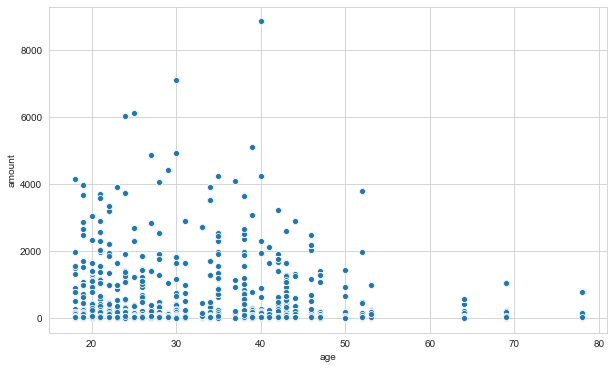

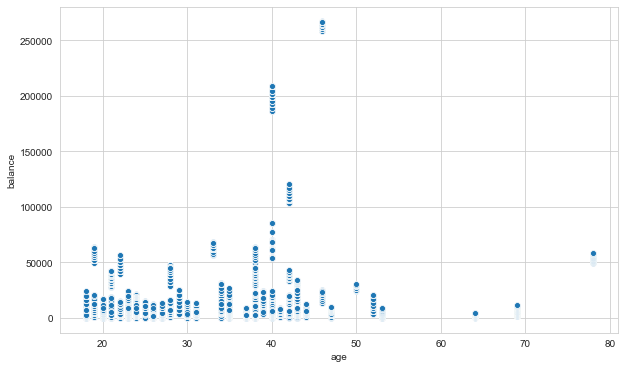

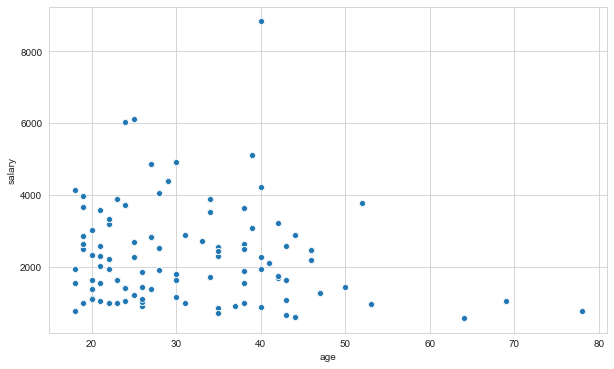

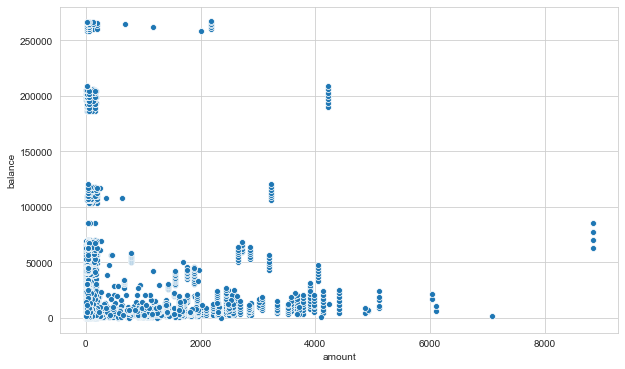

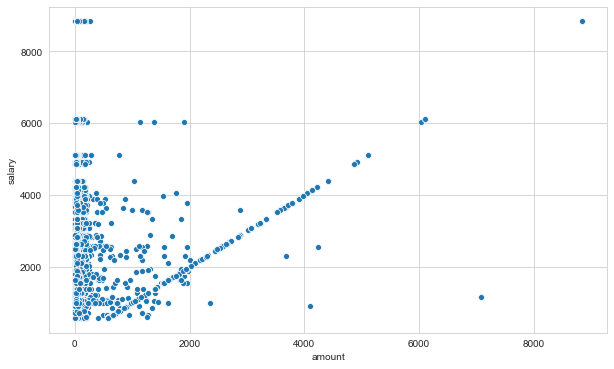

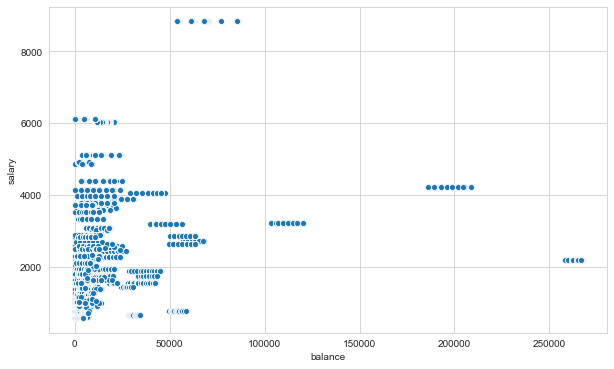

In [16]:
## Linearity

cols = ['age', 'amount', 'balance', 'salary']
combo = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        combo.append((i,j))

for i in range(len(combo)):
    plt.figure(figsize = (10,6))
    sns.scatterplot(data=data, x=cols[combo[i][0]], y=cols[combo[i][1]])

In [17]:
# Calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

cols = ['age', 'amount', 'balance', 'salary']
combo = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        combo.append((i,j))

# calculate spearman's correlation
for i in range(len(combo)):
    print(cols[combo[i][0]]+' vs '+cols[combo[i][1]])
    coef, p = spearmanr(data[cols[combo[i][0]]], data[cols[combo[i][1]]])
    print('Spearmans correlation coefficient: %.3f' % coef)

    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
    
    print('--------------------------------------------')

age vs amount
Spearmans correlation coefficient: 0.115
Samples are correlated (reject H0) p=0.000
--------------------------------------------
age vs balance
Spearmans correlation coefficient: 0.109
Samples are correlated (reject H0) p=0.000
--------------------------------------------
age vs salary
Spearmans correlation coefficient: -0.074
Samples are correlated (reject H0) p=0.000
--------------------------------------------
amount vs balance
Spearmans correlation coefficient: 0.221
Samples are correlated (reject H0) p=0.000
--------------------------------------------
amount vs salary
Spearmans correlation coefficient: 0.101
Samples are correlated (reject H0) p=0.000
--------------------------------------------
balance vs salary
Spearmans correlation coefficient: 0.508
Samples are correlated (reject H0) p=0.000
--------------------------------------------


## Regression

### Delete columns that contain a single value

In [18]:
# get number of unique values for each column
counts = data.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
cols = []
for i in to_del:
    cols.append(data.columns[i])
print(cols)
# drop useless columns
data.drop(cols, axis=1, inplace=True)
print(data.shape)

['currency', 'merchant_code', 'country']
(12043, 21)


### Null value inspection

In [19]:
data.isnull().mean()

status               0.000000
card_present_flag    0.359213
bpay_biller_code     0.926513
account              0.000000
long_lat             0.000000
txn_description      0.000000
merchant_id          0.359213
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.359213
merchant_state       0.359213
extraction           0.000000
amount               0.000000
transaction_id       0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
salary               0.000000
dtype: float64

In [20]:
thresh = 0.40
cols = list(data.columns)
to_drop = []

for i in range(len(cols)):
    if data[cols[i]].isnull().mean() > thresh:
        to_drop.append(cols[i])
data.drop(to_drop, axis = 1,inplace=True)
print(data.shape)

(12043, 20)


### Drop Usless Variables

In [21]:
drop = ['merchant_id', 'first_name', 'account', 'extraction', 'transaction_id', 'customer_id', 'merchant_suburb']
data.drop(drop, axis = 1, inplace=True)
data.shape

(12043, 13)

### Convert coordinates into separate columns

In [22]:
long_lat = list(data['long_lat'])

l = []
long = []
lat = []
for i in range(len(long_lat)):
    tup = tuple(long_lat[i].split('-'))
    l.append(tup)
    long.append(l[i][0].replace(' ', ''))
    lat.append(l[i][1])
data['long'] = long
data['lat'] = lat

data.drop('long_lat', inplace = True, axis = 1)

In [23]:
data['long'] = data['long'].astype(float)
data['lat'] = data['lat'].astype(float)

In [24]:
data.shape

(12043, 14)

In [25]:
data = data[data['merchant_long_lat'].notna()]

In [26]:
data.shape

(7717, 14)

In [27]:
m_long_lat = list(data['merchant_long_lat'])

g = []
m_long = []
m_lat = []
for i in range(len(m_long_lat)):
    tup = tuple(m_long_lat[i].split('-'))
    g.append(tup)
    m_long.append(g[i][0].replace(' ', ''))
    m_lat.append(g[i][1])
data['m_long'] = m_long
data['m_lat'] = m_lat

data.drop('merchant_long_lat', inplace = True, axis = 1)

C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [28]:
data.head()

,status,card_present_flag,txn_description,balance,date,gender,age,merchant_state,amount,movement,salary,long,lat,m_long,m_lat
0,authorized,1.0,POS,35.39,8/1/2018,F,26,QLD,16.25,debit,1013.67,153.41,27.95,153.38,27.99
1,authorized,0.0,SALES-POS,21.20,8/1/2018,F,26,NSW,14.19,debit,1013.67,153.41,27.95,151.21,33.87
2,authorized,1.0,POS,5.71,8/1/2018,M,38,NSW,6.42,debit,1002.13,151.23,33.94,151.21,33.87
3,authorized,1.0,SALES-POS,2117.22,8/1/2018,F,40,QLD,40.90,debit,892.09,153.10,27.66,153.05,26.68
4,authorized,1.0,SALES-POS,17.95,8/1/2018,F,26,QLD,3.25,debit,1013.67,153.41,27.95,153.44,28.06


### Convert date into separate date-time values

In [29]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day

C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [31]:
data.drop('date', inplace = True, axis = 1)

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
data.columns

Index(['status', 'card_present_flag', 'txn_description', 'balance', 'gender',
       'age', 'merchant_state', 'amount', 'movement', 'salary', 'long', 'lat',
       'm_long', 'm_lat', 'year', 'month', 'day'],
      dtype='object')

In [33]:
data = data[['status', 'card_present_flag', 'txn_description', 'balance', 'gender',
       'age', 'merchant_state', 'amount', 'movement', 'long', 'lat',
       'm_long', 'm_lat', 'year', 'month', 'day', 'salary']]

In [34]:
data.head()

,status,card_present_flag,txn_description,balance,gender,age,merchant_state,amount,movement,long,lat,m_long,m_lat,year,month,day,salary
0,authorized,1.0,POS,35.39,F,26,QLD,16.25,debit,153.41,27.95,153.38,27.99,2018,8,1,1013.67
1,authorized,0.0,SALES-POS,21.20,F,26,NSW,14.19,debit,153.41,27.95,151.21,33.87,2018,8,1,1013.67
2,authorized,1.0,POS,5.71,M,38,NSW,6.42,debit,151.23,33.94,151.21,33.87,2018,8,1,1002.13
3,authorized,1.0,SALES-POS,2117.22,F,40,QLD,40.90,debit,153.10,27.66,153.05,26.68,2018,8,1,892.09
4,authorized,1.0,SALES-POS,17.95,F,26,QLD,3.25,debit,153.41,27.95,153.44,28.06,2018,8,1,1013.67


In [35]:
#data.to_csv('final_copy.csv')

## Libraries

In [36]:
from numpy import mean
import numpy as np
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from numpy import arange
from pandas import set_option
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

## Scenario 1: Standard Scaler, Power Transform, PCA

### Standard Machine Learning Algorithms

>LR 0.235 (0.025)
>CART 0.470 (0.059)
>Lasso 0.235 (0.025)
>EN 0.209 (0.014)
>KNN 0.556 (0.036)
>SVR -0.013 (0.016)


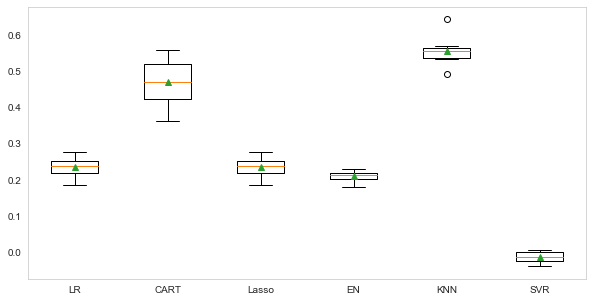

In [37]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LinearRegression())
    names.append('LR')
    # CART
    models.append(DecisionTreeRegressor())
    names.append('CART')
    # Lasso
    models.append(Lasso())
    names.append('Lasso')
    # EN
    models.append(ElasticNet())
    names.append('EN')
    # KNN
    models.append(KNeighborsRegressor())
    names.append('KNN')
    # SVR
    models.append(SVR())
    names.append('SVR')
    return models, names

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # wrap the model in a pipeline
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',StandardScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results

pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

### KNN Tuning

In [38]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
results = list()

vals = [1, 2, 3, 4, 5, 6, 7]

# evaluate each model
for i in vals:
    # wrap the model in a pipeline
    model = KNeighborsRegressor(n_neighbors = i)
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',StandardScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',model)])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>k=%s %.3f (%.3f)' % (i, mean(scores), std(scores)))

>k=1 0.490 (0.034)
>k=2 0.555 (0.031)
>k=3 0.564 (0.031)
>k=4 0.561 (0.033)
>k=5 0.556 (0.036)
>k=6 0.551 (0.036)
>k=7 0.549 (0.037)


### Ensemble Algorithms

>AB 0.002 (0.052)
>GBM 0.580 (0.027)
>RF 0.732 (0.025)
>ET 0.774 (0.025)


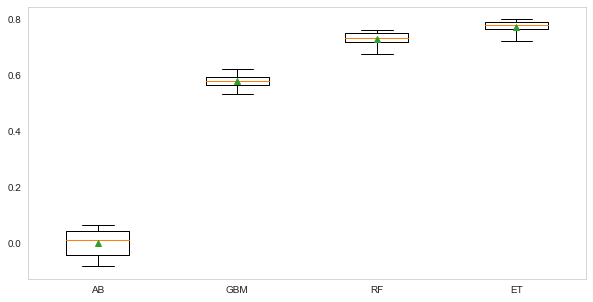

In [39]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # AB
    models.append(AdaBoostRegressor())
    names.append('AB')
    # GBM
    models.append(GradientBoostingRegressor())
    names.append('GBM')
    # RF
    models.append(RandomForestRegressor())
    names.append('RF')
    # ET
    models.append(ExtraTreesRegressor())
    names.append('ET')
    return models, names

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # wrap the model in a pipeline
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',StandardScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results

pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

### Tuning Extra Trees

In [40]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
results = list()

n_estimators = [10, 100, 1000]

# evaluate each model
for i in n_estimators:
    # wrap the model in a pipeline
    model = ExtraTreesRegressor(n_estimators = i)
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',StandardScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',model)])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>n=%s %.3f (%.3f)' % (i, mean(scores), std(scores)))

>n=10 0.742 (0.026)
>n=100 0.773 (0.025)
>n=1000 0.778 (0.026)


## Scenario 2: MinMaxScaler, Power Transform, PCA

### Standard Algorithms

>LR 0.257 (0.026)
>CART 0.472 (0.061)
>Lasso 0.257 (0.026)
>EN 0.227 (0.015)
>KNN 0.572 (0.041)
>SVR -0.009 (0.016)


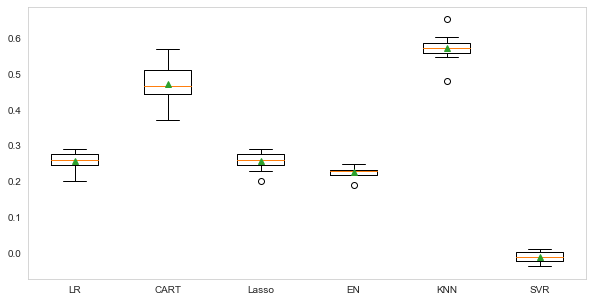

In [41]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LinearRegression())
    names.append('LR')
    # CART
    models.append(DecisionTreeRegressor())
    names.append('CART')
    # Lasso
    models.append(Lasso())
    names.append('Lasso')
    # EN
    models.append(ElasticNet())
    names.append('EN')
    # KNN
    models.append(KNeighborsRegressor())
    names.append('KNN')
    # SVR
    models.append(SVR())
    names.append('SVR')
    return models, names

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # wrap the model in a pipeline
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',MinMaxScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results

pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

### Tuning KNN

In [42]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
results = list()

vals = [1, 2, 3, 4, 5, 6, 7]

# evaluate each model
for i in vals:
    # wrap the model in a pipeline
    model = KNeighborsRegressor(n_neighbors = i)
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',MinMaxScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',model)])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>k=%s %.3f (%.3f)' % (i, mean(scores), std(scores)))

>k=1 0.499 (0.043)
>k=2 0.566 (0.033)
>k=3 0.573 (0.037)
>k=4 0.573 (0.037)
>k=5 0.572 (0.041)
>k=6 0.564 (0.040)
>k=7 0.561 (0.036)


### Ensemble Algorithms

>AB 0.024 (0.043)
>GBM 0.575 (0.027)
>RF 0.751 (0.025)
>ET 0.789 (0.025)


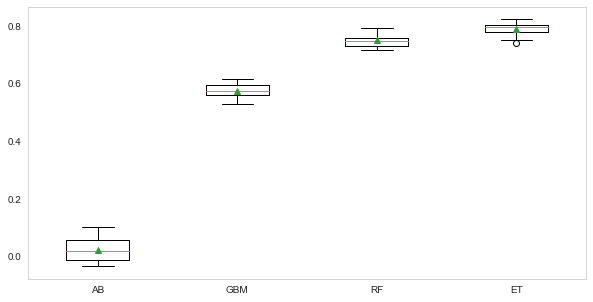

In [43]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # AB
    models.append(AdaBoostRegressor())
    names.append('AB')
    # GBM
    models.append(GradientBoostingRegressor())
    names.append('GBM')
    # RF
    models.append(RandomForestRegressor())
    names.append('RF')
    # ET
    models.append(ExtraTreesRegressor())
    names.append('ET')
    return models, names

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # wrap the model in a pipeline
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',MinMaxScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results

pyplot.figure(figsize = (10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.grid()
pyplot.show()

### Tuning Extra Trees

In [44]:
# load the dataset
def dataset(full_path):
    # load the dataset as a numpy array
    dataframe = read_csv(full_path, header=None, skiprows=1)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    return X.values, y, cat_ix, num_ix

# evaluate a model
def evaluate(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=10, random_state=7, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'final.csv'
# load the dataset
X, y, cat_ix, num_ix = dataset(full_path)
# define models
results = list()

n_estimators = [10, 100, 1000]

# evaluate each model
for i in n_estimators:
    # wrap the model in a pipeline
    model = ExtraTreesRegressor(n_estimators = i)
    ct = ColumnTransformer([('c',OneHotEncoder(drop = 'first'),cat_ix), ('n',MinMaxScaler(),num_ix)])
    pca = PCA(n_components = 0.95)    
    pipeline = Pipeline(steps=[('t', ct),('p', PowerTransformer()),('h', pca),('m',model)])
    # evaluate the model and store results
    scores = evaluate(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>n=%s %.3f (%.3f)' % (i, mean(scores), std(scores)))

>n=10 0.757 (0.023)
>n=100 0.790 (0.023)
>n=1000 0.791 (0.024)


The best model in this case is the Extra Trees with 1000 estimators with the above pipeline processing. The R2 Score shows that the model is a good fit across all the 10 folds. Of course, it is much simpler to use a train-test split to do the same task and without the above transforms. However, this is just one method of performing such a task. There are many more combinations of scalers and data preparation methods that can be used to tackle given issues such as imputation of null values. Here the null values were simply dropped. Whereas, they could be imputed with several strategies. Better feature engineering would lead to higher scores and possibly the use of less complex models.